In [1]:
import numpy as np
import copy

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib

import torch
import torch.nn as nn

In [2]:
# device = torch.device("cuda:0")
device = torch.device("cpu")

## 1D regression

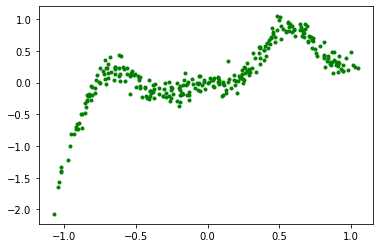

In [3]:
x = np.linspace(0,1,300)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
x = np.sort(x)

y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise

x = x*2
x = x - x.mean() # good practice to zero-center x in linear mapping
xx = torch.Tensor(x.reshape(-1,1))
yy = torch.Tensor(y.reshape(-1,1))

%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.show()

In [4]:
import dtnnlib as dtnn

In [7]:
net = nn.Sequential(
    dtnn.DistanceTransform_MinExp(1, 5),
#     nn.Linear(1, 5),
    nn.BatchNorm1d(5),
#     nn.LeakyReLU(0.1),
#     nn.ELU(),
    dtnn.DistanceTransform_MinExp(5, 1),
#     nn.Linear(5, 1),
    nn.BatchNorm1d(1),
    )

In [8]:
# for i in range(len(net)):
#     if isinstance(net[i], nn.BatchNorm1d):
#         net[i].weight.data *= -1

In [9]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.003)
criterion = nn.MSELoss()

In [10]:
yout = net.forward(xx)

In [11]:
xx.shape, yout.shape

(torch.Size([300, 1]), torch.Size([300, 1]))

In [12]:
yout

tensor([[nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [n

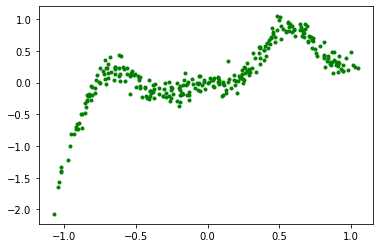

In [13]:
%matplotlib inline

plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yout.data.reshape(-1), marker='.', color='r')
plt.show()

In [381]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(111)

for epoch in range(10000):

    yout = net(xx)
    loss = criterion(yout, yy)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch%100 == 0:
        print(epoch, 'Error = ', float(loss))
        ax.clear()
        ax.scatter(x, y, marker='.', color='g')
        ax.scatter(x, yout.data.reshape(-1), color='r', marker='.')

        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")

0 Error =  1.2225019931793213


100 Error =  0.34598299860954285


200 Error =  0.15368898212909698


300 Error =  0.08578748255968094


400 Error =  0.05557634308934212


500 Error =  0.023707011714577675


600 Error =  0.017629195004701614


700 Error =  0.015933474525809288


800 Error =  0.014938750304281712


900 Error =  0.01432192511856556


1000 Error =  0.013874409720301628


1100 Error =  0.01354264747351408


1200 Error =  0.013313191942870617


1300 Error =  0.013161773793399334


1400 Error =  0.01306335348635912


1500 Error =  0.01300101075321436


1600 Error =  0.012960285879671574


1700 Error =  0.012933552265167236


1800 Error =  0.012915465049445629


1900 Error =  0.012898912653326988


2000 Error =  0.012890267185866833


2100 Error =  0.012883614748716354


2200 Error =  0.012879466637969017


2300 Error =  0.012876102700829506


2400 Error =  0.01287415437400341


2500 Error =  0.012872938998043537


2600 Error =  0.0128713957965374


2700 Error =  0.0128707801

TclError: invalid command name "pyimage813"

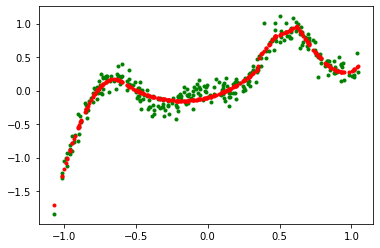

In [157]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yout.data.reshape(-1), color='r', marker='.')

## On 2D dataset

In [186]:
matplotlib.rcParams['figure.figsize'] = (12, 8)

In [189]:
num_points = 50
X1 = np.linspace(-2.5, 1.5, num_points)
X2 = np.linspace(-2, 4, num_points)
X1, X2 = np.meshgrid(X1, X2)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1.

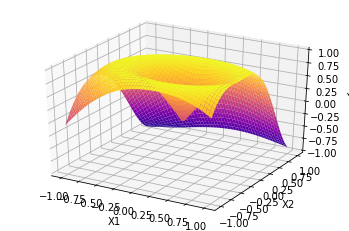

In [190]:
####Scaling the data to range -1,1
X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1

x1 = X1.reshape(-1)
x2 = X2.reshape(-1)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.scatter(X1, X2, Y)
ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [191]:
xx = torch.Tensor(np.c_[x1, x2])
yy = torch.Tensor(Y.reshape(-1,1))

## Building 2D model

In [284]:
net = nn.Sequential(
    dtnn.DistanceTransform(2, 5),
    nn.BatchNorm1d(5),
#     nn.LeakyReLU(0.1),
    dtnn.DistanceTransform(5,1),
    nn.BatchNorm1d(1),
    )

In [285]:
for i in range(len(net)):
    if isinstance(net[i], nn.BatchNorm1d):
        net[i].weight.data *= -1

In [286]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.0031)
criterion = nn.MSELoss()

In [287]:
yout = net.forward(xx)
xx.shape, yout.shape

(torch.Size([2500, 2]), torch.Size([2500, 1]))

In [288]:
yout.data

tensor([[-3.7583],
        [-3.6362],
        [-3.5165],
        ...,
        [ 1.1787],
        [ 1.1247],
        [ 1.0486]])

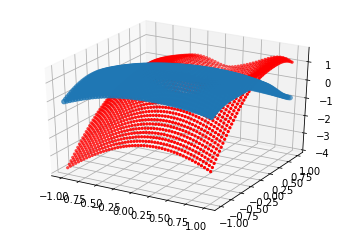

In [289]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.data.reshape(-1), color='r', marker='.')
plt.show()

In [290]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):

    yout = net(xx)
    loss = criterion(yout, yy)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch%100 == 0:
        print(epoch, 'Error = ', float(loss))
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.data.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)

0 Error =  1.7264703512191772
100 Error =  0.25623905658721924
200 Error =  0.03973584622144699
300 Error =  0.019573384895920753
400 Error =  0.015504619106650352
500 Error =  0.013896298594772816
600 Error =  0.012776988558471203
700 Error =  0.01184778194874525
800 Error =  0.011071830056607723
900 Error =  0.01043612789362669
1000 Error =  0.009922671131789684
1100 Error =  0.009511698968708515
1200 Error =  0.009184067137539387
1300 Error =  0.008923035115003586
1400 Error =  0.008714403957128525
1500 Error =  0.008546384982764721
1600 Error =  0.008409230038523674
1700 Error =  0.008294847793877125
1800 Error =  0.00819640513509512
1900 Error =  0.008107790723443031
2000 Error =  0.008023516274988651
2100 Error =  0.007938344962894917
2200 Error =  0.007847446016967297
2300 Error =  0.007746856659650803
2400 Error =  0.00763368234038353
2500 Error =  0.007505273446440697
2600 Error =  0.007356698624789715
2700 Error =  0.007177582010626793
2800 Error =  0.006952497176826
2900 Err

TclError: invalid command name "pyimage679"

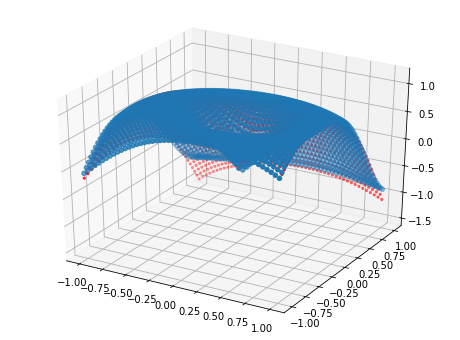

In [295]:
%matplotlib inline
fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.data.reshape(-1), color='r', marker='.')
plt.show()